In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [27]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Mapping Data

In [5]:
from sklearn.preprocessing import LabelEncoder as le

In [28]:
le_df = df 
le_sex = le()
le_bp = le()
le_cholesterol = le()
le_drug = le()
le_df['Sex'] = le_sex.fit_transform(le_df['Sex'])
le_df['BP'] = le_bp.fit_transform(le_df['BP'])
le_df['Cholesterol'] = le_cholesterol.fit_transform(le_df['Cholesterol'])
le_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = le_df.iloc[:,1:-1]
y = le_df.iloc[:,-1]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# Fitting Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
model.score(x_test, y_test)

0.925

In [36]:
y_predict = model.predict(x_test)

In [37]:
y_predict

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugB',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugA',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.925

### Vizualization Decision Tree

In [40]:
from sklearn import tree
from sklearn.tree import plot_tree

[Text(0.71875, 0.9545454545454546, 'Na_to_K <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]\nclass = drugY'),
 Text(0.65625, 0.8636363636363636, 'BP <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]\nclass = drugX'),
 Text(0.4375, 0.7727272727272727, 'Na_to_K <= 13.197\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugY'),
 Text(0.3125, 0.6818181818181818, 'Na_to_K <= 11.607\ngini = 0.444\nsamples = 24\nvalue = [16, 8, 0, 0, 0]\nclass = drugY'),
 Text(0.25, 0.5909090909090909, 'Na_to_K <= 8.316\ngini = 0.48\nsamples = 20\nvalue = [12, 8, 0, 0, 0]\nclass = drugY'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.3125, 0.5, 'Na_to_K <= 10.24\ngini = 0.498\nsamples = 17\nvalue = [9, 8, 0, 0, 0]\nclass = drugY'),
 Text(0.1875, 0.4090909090909091, 'Na_to_K <= 9.67\ngini = 0.469\nsamples = 8\nvalue = [3, 5, 0, 0, 0]\nclass = drugC'),
 Text(0.125, 0.3181818181818182, 'Na_to_K <= 9.033\ngini = 0.

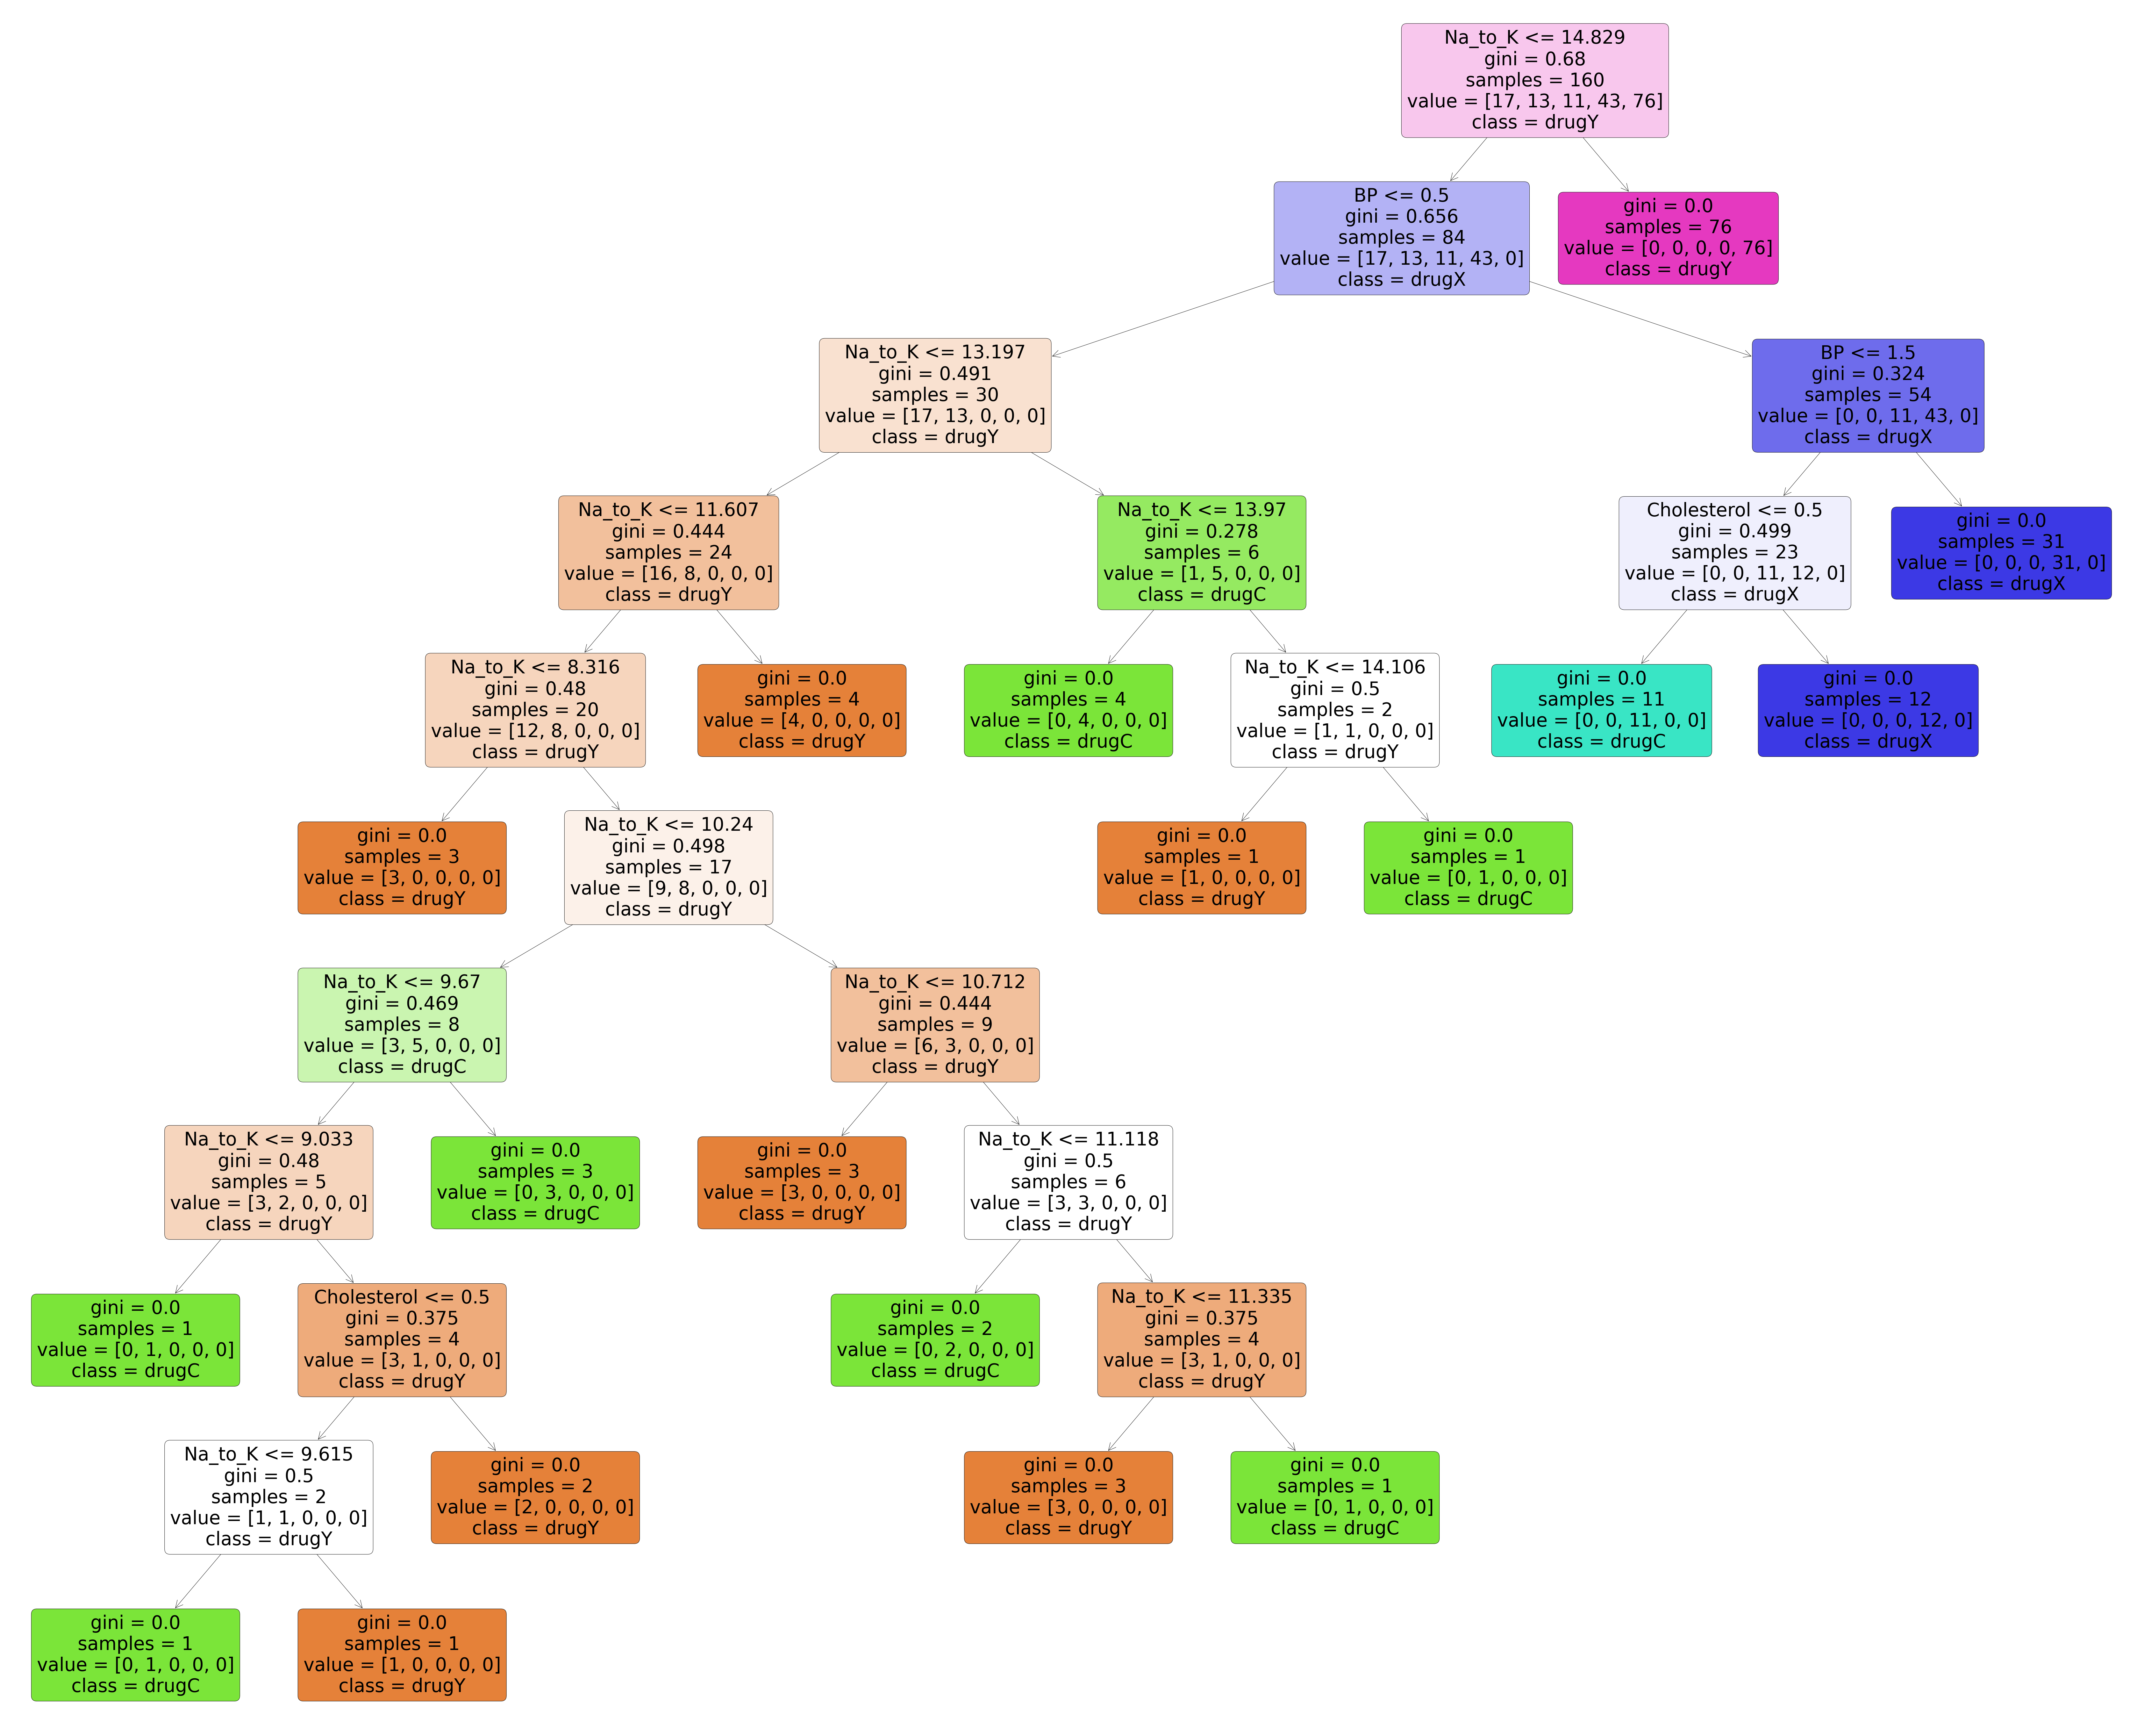

In [42]:
plt.figure(figsize=(120,100))
plt.title('Decision Tree Classifier')
plot_tree(model, max_depth = 10, feature_names = x_train.columns, class_names = y_train, filled = True, rounded = True)